In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from matplotlib.colors import ListedColormap, BoundaryNorm
from IPython.display import display, clear_output
from tqdm import tqdm


In [12]:
# Parâmetros da simulação
n = 100  # Tamanho da floresta
m = 500  # Número de repetições da simulação
plist = np.arange(0.1, 0.66, 0.05)  # Lista de valores de p

In [13]:
# Funções de apoio
def plot_heatmap(matrix: np.ndarray) -> None:
    cmap = ListedColormap(['white', 'green', 'red', 'black'])
    norm = BoundaryNorm([0, 1, 2, 3, 4], cmap.N)
    plt.imshow(matrix, cmap=cmap, norm=norm, interpolation='nearest')
    plt.colorbar()
    plt.title("Mapa de Calor")
    plt.xlabel("Colunas")
    plt.ylabel("Linhas")
    plt.show()

In [14]:
def generate_probabilitie_matrix(n: int) -> NDArray[np.float64]:
    return np.random.rand(n, n)

In [15]:
def initialize_forest(matrix: NDArray[np.float64], p: float) -> NDArray[np.int8]:
    forest = np.zeros((n, n), dtype=np.int8)
    for i in range(n):
        for j in range(n):
            if matrix[i, j] < p:
                forest[i, j] = 1
    return forest

In [16]:
def generate_burning_tree(forest: NDArray[np.int8]) -> tuple:
    while True:
        x, y = np.random.randint(0, n, size=2)
        if forest[x, y] == 1:
            forest[x, y] = 2
            return forest, [(x, y)]

In [17]:
def update_forest(forest: NDArray[np.int8], burning_trees: list) -> tuple:
    new_forest = forest.copy()
    new_burning_trees = set()
    for x, y in burning_trees:
        new_forest[x, y] = 3
        for i in range(-1, 2):
            for j in range(-1, 2):
                if (i != 0 or j != 0) and 0 <= x + i < n and 0 <= y + j < n:
                    if forest[x + i, y + j] == 1:
                        new_forest[x + i, y + j] = 2
                        new_burning_trees.add((x + i, y + j))
    return new_forest, list(new_burning_trees)

In [18]:
def simulate_forest_fire(p: float) -> dict:
    probabilities_matrixes = [generate_probabilitie_matrix(n) for _ in range(m)]
    results = {'PAreaC': [], 'PArvC': [], 'NIter': []}
    for matrix in probabilities_matrixes:
        forest = initialize_forest(matrix, p)
        forest, burning_trees = generate_burning_tree(forest)
        iterations = 0
        while burning_trees:
            forest, burning_trees = update_forest(forest, burning_trees)
            iterations += 1
        total_burned = np.sum(forest == 3)
        total_trees = np.sum(forest == 1) + total_burned
        results['PAreaC'].append(total_burned / (n ** 2) * 100)
        results['PArvC'].append(total_burned / total_trees * 100)
        results['NIter'].append(iterations)
    return results

In [19]:
# Executar simulações para cada valor de p
simulation_results = {p: simulate_forest_fire(p) for p in plist}

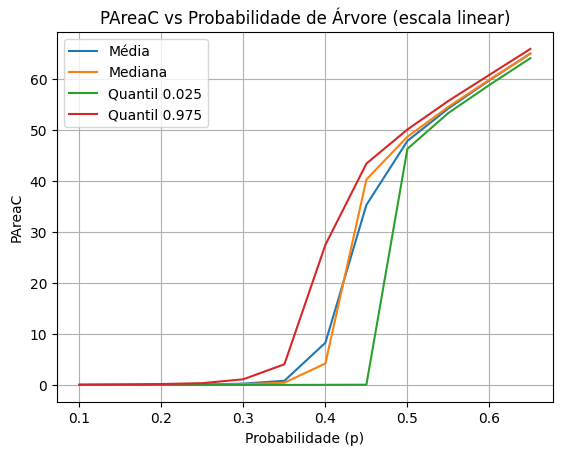

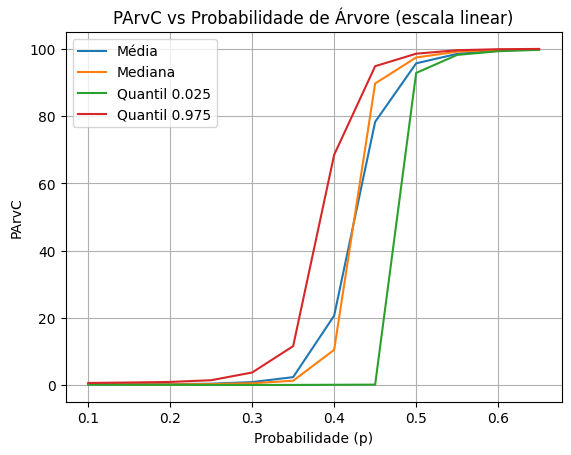

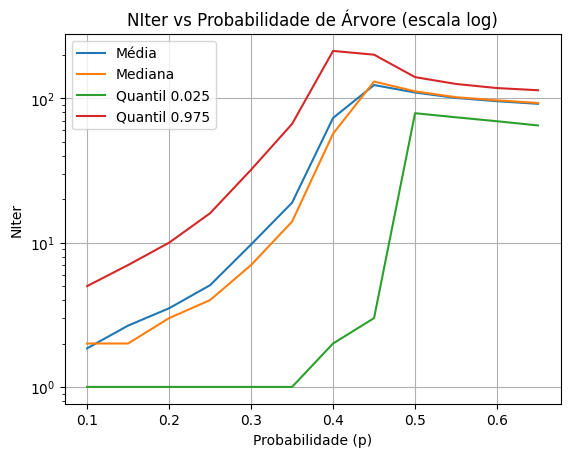

In [21]:
# Função para plotar gráficos com a especificação da escala do eixo vertical
def plot_results(metric: str, y_scale: str) -> None:
    plt.figure()
    data = [simulation_results[p][metric] for p in plist]
    plt.plot(plist, [np.mean(d) for d in data], label='Média')
    plt.plot(plist, [np.median(d) for d in data], label='Mediana')
    plt.plot(plist, [np.quantile(d, 0.025) for d in data], label='Quantil 0.025')
    plt.plot(plist, [np.quantile(d, 0.975) for d in data], label='Quantil 0.975')
    plt.xlabel('Probabilidade (p)')
    plt.ylabel(metric)
    plt.title(f'{metric} vs Probabilidade de Árvore (escala {y_scale})')
    plt.yscale(y_scale)
    plt.legend()
    plt.grid(True)
    plt.show()

# Gerar gráficos para cada métrica
# PAreaC - Escala natural
plot_results('PAreaC', 'linear')

# PArvC - Escala natural
plot_results('PArvC', 'linear')

# NIter - Escala logarítmica
plot_results('NIter', 'log')